EC done at the end

In [4]:
# libraries!
import numpy as np      
import pandas as pd     

In [5]:
# Reading in the digits data
cleaned_filename = "digits_cleaned.csv"
df_tidy = pd.read_csv(cleaned_filename)   # encoding="utf-8" et al.
print(f"{cleaned_filename} : file read into a pandas dataframe.")
df_tidy

digits_cleaned.csv : file read into a pandas dataframe.


,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix55,pix56,pix57,pix58,pix59,pix60,pix61,pix62,pix63,actual_digit
0,0,0,9,14,8,1,0,0,0,0,...,0,0,0,11,16,15,11,1,0,8
1,0,0,11,12,0,0,0,0,0,2,...,0,0,0,9,12,13,3,0,0,9
2,0,0,1,9,15,11,0,0,0,0,...,0,0,0,1,10,13,3,0,0,0
3,0,0,0,0,14,13,1,0,0,0,...,0,0,0,0,1,13,16,1,0,1
4,0,0,5,12,1,0,0,0,0,0,...,2,0,0,3,11,8,13,12,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,0,0,4,10,13,6,0,0,0,1,...,0,0,0,2,14,15,9,0,0,9
1764,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,0
1765,0,0,1,11,15,1,0,0,0,0,...,0,0,0,2,9,13,6,0,0,8
1766,0,0,2,10,7,0,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9


In [6]:
# Keeping our column names in variables, for reference
COLUMNS = df_tidy.columns            # "list" of columns
print(f"COLUMNS is {COLUMNS}\n")  
  # It's a "pandas" list, called an Index
  # use it just as a Python list of strings:
print(f"COLUMNS[0] is {COLUMNS[0]}\n")

# Creating a dictionary to look up any column index by name
COL_INDEX = {}
for i, name in enumerate(COLUMNS):
    COL_INDEX[name] = i  # using the name (as key), look up the value (i)
print(f"COL_INDEX is {COL_INDEX}\n\n")

COLUMNS is Index(['pix0', 'pix1', 'pix2', 'pix3', 'pix4', 'pix5', 'pix6', 'pix7', 'pix8',
       'pix9', 'pix10', 'pix11', 'pix12', 'pix13', 'pix14', 'pix15', 'pix16',
       'pix17', 'pix18', 'pix19', 'pix20', 'pix21', 'pix22', 'pix23', 'pix24',
       'pix25', 'pix26', 'pix27', 'pix28', 'pix29', 'pix30', 'pix31', 'pix32',
       'pix33', 'pix34', 'pix35', 'pix36', 'pix37', 'pix38', 'pix39', 'pix40',
       'pix41', 'pix42', 'pix43', 'pix44', 'pix45', 'pix46', 'pix47', 'pix48',
       'pix49', 'pix50', 'pix51', 'pix52', 'pix53', 'pix54', 'pix55', 'pix56',
       'pix57', 'pix58', 'pix59', 'pix60', 'pix61', 'pix62', 'pix63',
       'actual_digit'],
      dtype='object')

COLUMNS[0] is pix0

COL_INDEX is {'pix0': 0, 'pix1': 1, 'pix2': 2, 'pix3': 3, 'pix4': 4, 'pix5': 5, 'pix6': 6, 'pix7': 7, 'pix8': 8, 'pix9': 9, 'pix10': 10, 'pix11': 11, 'pix12': 12, 'pix13': 13, 'pix14': 14, 'pix15': 15, 'pix16': 16, 'pix17': 17, 'pix18': 18, 'pix19': 19, 'pix20': 20, 'pix21': 21, 'pix22': 22, 'pix23'

In [7]:
#
# We need to drop the actual_digit
ROW = 0
COLUMN = 1
#Df_model1 = df_tidy.drop( 'actual_digit', axis=COLUMN )

df_model1 = df_tidy
df_model1

,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix55,pix56,pix57,pix58,pix59,pix60,pix61,pix62,pix63,actual_digit
0,0,0,9,14,8,1,0,0,0,0,...,0,0,0,11,16,15,11,1,0,8
1,0,0,11,12,0,0,0,0,0,2,...,0,0,0,9,12,13,3,0,0,9
2,0,0,1,9,15,11,0,0,0,0,...,0,0,0,1,10,13,3,0,0,0
3,0,0,0,0,14,13,1,0,0,0,...,0,0,0,0,1,13,16,1,0,1
4,0,0,5,12,1,0,0,0,0,0,...,2,0,0,3,11,8,13,12,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,0,0,4,10,13,6,0,0,0,1,...,0,0,0,2,14,15,9,0,0,9
1764,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,0
1765,0,0,1,11,15,1,0,0,0,0,...,0,0,0,2,9,13,6,0,0,8
1766,0,0,2,10,7,0,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9


In [8]:
#
A = df_model1.to_numpy()    # .values gets the numpy array
print(A)


[[ 0  0  9 ...  1  0  8]
 [ 0  0 11 ...  0  0  9]
 [ 0  0  1 ...  0  0  0]
 ...
 [ 0  0  1 ...  0  0  8]
 [ 0  0  2 ...  0  0  9]
 [ 0  0 10 ...  1  0  8]]


In [9]:

# Making sure all are float type numbers
A = A.astype('float64')  
print(A)

[[ 0.  0.  9. ...  1.  0.  8.]
 [ 0.  0. 11. ...  0.  0.  9.]
 [ 0.  0.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  1. ...  0.  0.  8.]
 [ 0.  0.  2. ...  0.  0.  9.]
 [ 0.  0. 10. ...  1.  0.  8.]]


In [10]:
# Storing the shape
NUM_ROWS, NUM_COLS = A.shape
print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")


The dataset has 1768 rows and 65 cols


In [11]:
print("+++ Start of data definitions +++\n")

#
# we could do this at the data-frame level, too!
#

X_all = A[:,0:64]  # X (features) ... is all rows, columns 0, 1, 2, 3 ..., 64
y_all = A[:,64]    # y (labels) ... is all rows, column 64 only

print(f"y_all (just the digits)   are \n {y_all}")
print(f"X_all (just the pixels) are \n {X_all}")

+++ Start of data definitions +++

y_all (just the digits)   are 
 [8. 9. 0. ... 8. 9. 8.]
X_all (just the pixels) are 
 [[ 0.  0.  9. ... 11.  1.  0.]
 [ 0.  0. 11. ...  3.  0.  0.]
 [ 0.  0.  1. ...  3.  0.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [12]:
#
# we scramble the data, to remove (potential) dependence on its ordering: 
# 
indices = np.random.permutation(len(y_all))  # indices is a permutation-list

# we scramble both X and y, necessarily with the same permutation
X_labeled = X_all[indices]              # we apply the _same_ permutation to each!
y_labeled = y_all[indices]              # again...
print(f"The scrambled digits are \n {y_labeled}")
print(f"The corresponding pixel rows are \n {X_labeled}")


The scrambled digits are 
 [3. 9. 6. ... 3. 8. 8.]
The corresponding pixel rows are 
 [[ 0.  0.  1. ... 15.  6.  0.]
 [ 0.  0.  0. ...  6.  0.  0.]
 [ 0.  0.  0. ... 14.  6.  0.]
 ...
 [ 0.  0.  9. ... 10.  0.  0.]
 [ 0.  1. 14. ...  2.  0.  0.]
 [ 0.  0.  7. ...  0.  0.  0.]]


In [13]:
#
# We next separate into test data and training data ... 

# a common convention:  train on 80%, test on 20%    Let's define the TEST_PERCENT
#

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )

print(f"Held-out data... (testing data: {len(y_test)})")
print(f"y_test: {y_test}")
print(f"X_test (a few rows): {X_test[0:5,:]}")  # 5 rows
print()
print(f"Data used for modeling... (training data: {len(y_train)})")
print(f"y_train: {y_train}")
print(f"X_train (a few rows): {X_train[0:5,:]}")  # 5 rows

training with 1414 rows;  testing with 354 rows

Held-out data... (testing data: 354)
y_test: [5. 0. 2. 1. 9. 6. 4. 5. 7. 2. 6. 2. 7. 5. 9. 9. 4. 1. 2. 3. 1. 8. 5. 4.
 2. 2. 7. 6. 6. 5. 8. 9. 8. 3. 4. 3. 0. 8. 7. 6. 4. 4. 1. 3. 1. 9. 1. 9.
 3. 8. 5. 1. 0. 6. 4. 3. 2. 0. 8. 3. 5. 5. 8. 6. 7. 4. 9. 0. 9. 4. 0. 7.
 0. 9. 7. 8. 5. 4. 0. 5. 3. 4. 4. 3. 6. 6. 2. 3. 7. 0. 2. 9. 2. 4. 3. 7.
 8. 6. 7. 8. 5. 8. 2. 0. 5. 0. 6. 2. 4. 7. 3. 6. 1. 8. 7. 4. 3. 6. 3. 2.
 8. 7. 2. 1. 1. 9. 4. 3. 2. 6. 3. 6. 3. 9. 1. 6. 2. 5. 7. 5. 4. 1. 1. 9.
 2. 1. 9. 1. 9. 6. 3. 4. 4. 1. 0. 0. 2. 5. 3. 7. 5. 2. 8. 4. 0. 6. 6. 7.
 8. 5. 9. 1. 2. 6. 8. 3. 3. 4. 2. 2. 5. 9. 3. 1. 5. 2. 5. 1. 4. 3. 2. 0.
 0. 6. 4. 9. 3. 9. 4. 5. 4. 3. 9. 9. 3. 0. 8. 0. 4. 9. 1. 2. 3. 8. 9. 6.
 2. 9. 2. 2. 9. 0. 1. 2. 3. 5. 4. 7. 0. 6. 5. 4. 7. 8. 3. 5. 5. 3. 0. 7.
 0. 3. 1. 4. 4. 6. 0. 9. 6. 7. 6. 1. 7. 3. 1. 9. 9. 7. 9. 0. 8. 3. 3. 2.
 6. 4. 3. 6. 4. 8. 6. 9. 0. 6. 1. 5. 2. 8. 6. 6. 4. 9. 0. 3. 7. 5. 3. 6.
 1. 4. 9. 8. 2. 4. 1. 9. 3. 0.

In [14]:
#
# +++ This is the "Model-building and Model-training Cell"
#       
# Create a kNN model and train it! 
#
from sklearn.neighbors import KNeighborsClassifier

k = 84   # we don't know what k to use, so we guess!  (this will _not_ be a good value)
knn_model = KNeighborsClassifier(n_neighbors=k)       # here, k is the "k" in kNN

# we train the model (it's one line!)
knn_model.fit(X_train, y_train)                              # yay!  trained!
print("Created and trained a knn classifier with k =", k)  

Created and trained a knn classifier with k = 84


In [15]:
#
# +++ This cell will "Model-testing Cell"

# We run our test set:

# the function knn_model.predict is the instantiation of our model
# it's what runs the k-nearest-neighbors algorithm:
predicted_labels = knn_model.predict(X_test)   
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

Predicted labels: [5. 0. 2. 2. 8. 6. 4. 5. 7. 2. 6. 2. 7. 5. 9. 0. 4. 1. 2. 3. 2. 8. 5. 4.
 2. 2. 7. 6. 6. 5. 8. 9. 8. 3. 4. 3. 0. 8. 7. 6. 4. 4. 6. 3. 1. 9. 9. 9.
 7. 1. 5. 1. 0. 6. 4. 8. 2. 0. 8. 3. 5. 5. 8. 6. 7. 4. 9. 0. 9. 7. 0. 7.
 0. 9. 7. 8. 5. 4. 0. 5. 3. 4. 4. 3. 6. 6. 2. 3. 7. 0. 2. 7. 2. 4. 3. 7.
 8. 6. 7. 8. 5. 8. 2. 0. 5. 0. 6. 2. 4. 7. 3. 6. 1. 8. 7. 4. 3. 6. 3. 2.
 1. 7. 2. 1. 1. 9. 4. 3. 2. 6. 3. 6. 3. 9. 1. 6. 2. 5. 7. 5. 4. 1. 1. 9.
 2. 1. 9. 1. 9. 6. 3. 4. 4. 1. 0. 0. 2. 5. 3. 7. 5. 7. 8. 4. 0. 6. 6. 7.
 1. 5. 9. 1. 2. 6. 8. 8. 3. 4. 2. 2. 5. 9. 3. 1. 5. 2. 5. 1. 4. 3. 2. 0.
 0. 6. 4. 9. 8. 9. 4. 5. 4. 3. 9. 9. 3. 0. 8. 0. 4. 9. 1. 2. 3. 8. 9. 6.
 2. 7. 2. 2. 9. 0. 1. 2. 3. 5. 4. 7. 0. 6. 5. 4. 7. 8. 3. 5. 5. 3. 0. 7.
 0. 3. 1. 4. 4. 6. 0. 9. 6. 7. 6. 1. 7. 3. 1. 9. 9. 7. 9. 0. 8. 3. 3. 2.
 6. 4. 3. 6. 4. 8. 6. 1. 0. 1. 1. 5. 1. 8. 6. 6. 4. 9. 0. 3. 7. 5. 3. 6.
 1. 4. 9. 1. 2. 4. 1. 9. 3. 0. 7. 3. 5. 7. 9. 1. 6. 7. 9. 3. 8. 3. 2. 3.
 3. 2. 2. 9. 5. 4. 7. 8. 9. 5. 1.

In [16]:
DIGITS = ["0","1","2","3","4","5","6","7","8","9"]

In [17]:
#
# Let's print these more helpfully, in a vertical table
#

def compare_labels(predicted_labels, actual_labels):
    """ a more neatly formatted comparison """
    NUM_LABELS = len(predicted_labels)
    num_correct = 0
    
    for i in range(NUM_LABELS):
        p = int(round(predicted_labels[i]))         # round protects from fp error 
        a = int(round(actual_labels[i]))
        result = "incorrect"
        if p == a:  # if they match,
            result = ""       # no longer incorrect
            num_correct += 1  # and we count a match!

        print(f"row {i:>3d} : {DIGITS[p]:>12s} {DIGITS[a]:<12s}   {result}")   

    print()
    print("Correct:", num_correct, "out of", NUM_LABELS)
    return num_correct

# let's try it out!
compare_labels(predicted_labels,actual_labels)

row   0 :            5 5              
row   1 :            0 0              
row   2 :            2 2              
row   3 :            2 1              incorrect
row   4 :            8 9              incorrect
row   5 :            6 6              
row   6 :            4 4              
row   7 :            5 5              
row   8 :            7 7              
row   9 :            2 2              
row  10 :            6 6              
row  11 :            2 2              
row  12 :            7 7              
row  13 :            5 5              
row  14 :            9 9              
row  15 :            0 9              incorrect
row  16 :            4 4              
row  17 :            1 1              
row  18 :            2 2              
row  19 :            3 3              
row  20 :            2 1              incorrect
row  21 :            8 8              
row  22 :            5 5              
row  23 :            4 4              
row  24 :            2 2    

328

In [18]:
from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#
best_k = 84  # Not correct!
best_accuracy = 0.0  # also not correct...

# Note that we are cross-validating using only our TEST data!
for k in range(1,85):
    knn_cv_model = KNeighborsClassifier(n_neighbors=k)   # build knn_model for every k!
    cv_scores = cross_val_score( knn_cv_model, X_train, y_train, cv=5 )  # cv=5 means 80/20
    # print(cv_scores)  # just to see the five scores... 
    average_cv_accuracy = cv_scores.mean()  # mean() is numpy's built-in average function
    if average_cv_accuracy > best_accuracy:
        best_k = k
        best_accuracy = average_cv_accuracy
    print(f"k: {k:2d}  cv accuracy: {average_cv_accuracy:7.4f}")

    
# assign best value of k to best_k
best_k = best_k      
# you'll need to use the loop above to find and remember the real best_k

print(f"best_k = {best_k}   yields the highest average cv accuracy.")  # print the best one


k:  1  cv accuracy:  0.9866
k:  2  cv accuracy:  0.9830
k:  3  cv accuracy:  0.9837
k:  4  cv accuracy:  0.9816
k:  5  cv accuracy:  0.9844
k:  6  cv accuracy:  0.9802
k:  7  cv accuracy:  0.9809
k:  8  cv accuracy:  0.9809
k:  9  cv accuracy:  0.9823
k: 10  cv accuracy:  0.9816
k: 11  cv accuracy:  0.9788
k: 12  cv accuracy:  0.9760
k: 13  cv accuracy:  0.9724
k: 14  cv accuracy:  0.9696
k: 15  cv accuracy:  0.9689
k: 16  cv accuracy:  0.9675
k: 17  cv accuracy:  0.9675
k: 18  cv accuracy:  0.9668
k: 19  cv accuracy:  0.9653
k: 20  cv accuracy:  0.9639
k: 21  cv accuracy:  0.9632
k: 22  cv accuracy:  0.9625
k: 23  cv accuracy:  0.9611
k: 24  cv accuracy:  0.9611
k: 25  cv accuracy:  0.9618
k: 26  cv accuracy:  0.9604
k: 27  cv accuracy:  0.9590
k: 28  cv accuracy:  0.9561
k: 29  cv accuracy:  0.9576
k: 30  cv accuracy:  0.9561
k: 31  cv accuracy:  0.9533
k: 32  cv accuracy:  0.9533
k: 33  cv accuracy:  0.9505
k: 34  cv accuracy:  0.9498
k: 35  cv accuracy:  0.9484
k: 36  cv accuracy: 

In [19]:
#
# With the best k, we build and train a new model:
#
# Now, we use best_k instead of the original, randomly-guessed value    
#
best_k = 1
from sklearn.neighbors import KNeighborsClassifier
knn_model_tuned = KNeighborsClassifier(n_neighbors=best_k)   # here, we use the best_k!

# we train the model (one line!)
knn_model_tuned.fit(X_train, y_train)                              # yay!  trained!
print(f"Created + trained a knn classifier, now tuned with a (best) k of {best_k}")  

# How does it do?!  The next cell will show...

Created + trained a knn classifier, now tuned with a (best) k of 1


In [20]:
#
# Re-create and re-run the  "Model-testing Cell"     How does it do with best_k?!
#
predicted_labels = knn_model_tuned.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual labels:", actual_labels)

# And, the overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.\n\n")

# Plus, we'll print our nicer table...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [5. 0. 2. 1. 8. 6. 4. 5. 7. 2. 6. 2. 7. 5. 9. 9. 4. 1. 2. 3. 1. 8. 5. 4.
 2. 2. 7. 6. 6. 5. 8. 9. 8. 3. 4. 3. 0. 8. 7. 6. 4. 4. 1. 3. 1. 9. 1. 5.
 3. 8. 5. 1. 0. 6. 4. 3. 2. 0. 8. 3. 5. 5. 8. 6. 7. 4. 9. 0. 9. 4. 0. 7.
 0. 9. 7. 8. 5. 4. 0. 5. 3. 4. 4. 3. 6. 6. 2. 3. 7. 0. 2. 9. 2. 4. 3. 7.
 8. 6. 7. 8. 5. 8. 2. 0. 5. 0. 6. 2. 4. 7. 3. 6. 1. 8. 7. 4. 3. 6. 3. 2.
 8. 7. 2. 1. 1. 9. 4. 3. 2. 6. 3. 6. 3. 9. 1. 6. 2. 5. 7. 5. 4. 1. 1. 9.
 2. 1. 9. 1. 9. 6. 3. 4. 4. 1. 0. 0. 2. 5. 3. 7. 5. 2. 8. 4. 0. 6. 6. 7.
 8. 5. 9. 1. 2. 6. 8. 3. 3. 4. 2. 2. 5. 9. 3. 1. 5. 2. 5. 1. 4. 3. 2. 0.
 0. 6. 4. 9. 3. 9. 4. 5. 4. 3. 9. 9. 3. 0. 8. 0. 4. 9. 1. 2. 3. 8. 9. 6.
 2. 9. 2. 2. 9. 0. 1. 2. 3. 5. 4. 7. 0. 6. 5. 4. 7. 8. 3. 5. 5. 3. 0. 7.
 0. 3. 1. 4. 4. 6. 0. 9. 6. 7. 6. 1. 7. 3. 1. 9. 9. 7. 9. 0. 8. 3. 3. 2.
 6. 4. 3. 6. 4. 8. 6. 9. 0. 1. 1. 5. 2. 8. 6. 6. 4. 9. 0. 3. 7. 5. 3. 6.
 1. 4. 9. 8. 2. 4. 1. 9. 3. 0. 7. 3. 5. 7. 9. 1. 6. 7. 9. 3. 8. 2. 2. 3.
 3. 2. 1. 9. 5. 4. 7. 8. 9. 5. 1.

350

In [21]:
#
# Ok!  We have tuned knn to use the "best" value of k...
#
# And, we should now use ALL available data to train our final predictive model:
#

knn_model_final = KNeighborsClassifier(n_neighbors=best_k)   # here, we use the best_k
knn_model_final.fit(X_all, y_all)                              # here we use ALL the data!
print(f"Created + trained a 'final' knn classifier, with a (best) k of {best_k}") 

Created + trained a 'final' knn classifier, with a (best) k of 1


In [22]:
#
# final predictive model (k-nearest-neighbor), with tuned k + ALL data incorporated
#

def predictive_model( Features, Model ):
    """ input: a list of four features 
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                 # extra brackets needed

    # The model's prediction!
    predicted_species = Model.predict(our_features)
    
    # a bit awkward
    predicted_species = int(round(predicted_species[0]))  # unpack one element
    return predicted_species

    
#
# Try it!
# 
# Features = eval(input("Enter new Features: "))
#

LoD = [[0,0,0,8,14,0,0,0,0,0,5,16,11,0,0,0,0,1,15,14,1,6,0,0,0,7,16,5,3,16,8,0,0,8,16,8,14,16,2,0,0,0,6,14,16,11,0,0,0,0,0,6,16,4,0,0,0,0,0,10,15,0,0,0],
[0,0,0,5,14,12,2,0,0,0,7,15,8,14,4,0,0,0,6,2,3,13,1,0,0,0,0,1,13,4,0,0,0,0,1,11,9,0,0,0,0,8,16,13,0,0,0,0,0,5,14,16,11,2,0,0,0,0,0,6,12,13,3,0],
[0,0,0,3,16,3,0,0,0,0,0,12,16,2,0,0,0,0,8,16,16,4,0,0,0,7,16,15,16,12,11,0,0,8,16,16,16,13,3,0,0,0,0,7,14,1,0,0,0,0,0,6,16,0,0,0,0,0,0,4,14,0,0,0],
[0,0,0,3,15,10,1,0,0,0,0,11,10,16,4,0,0,0,0,12,1,15,6,0,0,0,0,3,4,15,4,0,0,0,0,6,15,6,0,0,0,4,15,16,9,0,0,0,0,0,13,16,15,9,3,0,0,0,0,4,9,14,7,0],
[0,0,0,3,16,3,0,0,0,0,0,10,16,11,0,0,0,0,4,16,16,8,0,0,0,2,14,12,16,5,0,0,0,10,16,14,16,16,11,0,0,5,12,13,16,8,3,0,0,0,0,2,15,3,0,0,0,0,0,4,12,0,0,0],
[0,0,7,15,15,4,0,0,0,8,16,16,16,4,0,0,0,8,15,8,16,4,0,0,0,0,0,10,15,0,0,0,0,0,1,15,9,0,0,0,0,0,6,16,2,0,0,0,0,0,8,16,8,11,9,0,0,0,9,16,16,12,3,0]]


# run on each one:
for Features in LoD:
    predicted_species = predictive_model( Features, knn_model_final )  # pass in the model, too!
    name = DIGITS[predicted_species]
    print(f"I predict {name} from the features {Features}")

I predict 4 from the features [0, 0, 0, 8, 14, 0, 0, 0, 0, 0, 5, 16, 11, 0, 0, 0, 0, 1, 15, 14, 1, 6, 0, 0, 0, 7, 16, 5, 3, 16, 8, 0, 0, 8, 16, 8, 14, 16, 2, 0, 0, 0, 6, 14, 16, 11, 0, 0, 0, 0, 0, 6, 16, 4, 0, 0, 0, 0, 0, 10, 15, 0, 0, 0]
I predict 2 from the features [0, 0, 0, 5, 14, 12, 2, 0, 0, 0, 7, 15, 8, 14, 4, 0, 0, 0, 6, 2, 3, 13, 1, 0, 0, 0, 0, 1, 13, 4, 0, 0, 0, 0, 1, 11, 9, 0, 0, 0, 0, 8, 16, 13, 0, 0, 0, 0, 0, 5, 14, 16, 11, 2, 0, 0, 0, 0, 0, 6, 12, 13, 3, 0]
I predict 4 from the features [0, 0, 0, 3, 16, 3, 0, 0, 0, 0, 0, 12, 16, 2, 0, 0, 0, 0, 8, 16, 16, 4, 0, 0, 0, 7, 16, 15, 16, 12, 11, 0, 0, 8, 16, 16, 16, 13, 3, 0, 0, 0, 0, 7, 14, 1, 0, 0, 0, 0, 0, 6, 16, 0, 0, 0, 0, 0, 0, 4, 14, 0, 0, 0]
I predict 2 from the features [0, 0, 0, 3, 15, 10, 1, 0, 0, 0, 0, 11, 10, 16, 4, 0, 0, 0, 0, 12, 1, 15, 6, 0, 0, 0, 0, 3, 4, 15, 4, 0, 0, 0, 0, 6, 15, 6, 0, 0, 0, 4, 15, 16, 9, 0, 0, 0, 0, 0, 13, 16, 15, 9, 3, 0, 0, 0, 0, 4, 9, 14, 7, 0]
I predict 4 from the features [0, 0, 0, 3, 16,

<br>

#### Digit-recognition experiments:
+ abstract the above process into a function, so that we can run the digit-modeling on <i>different numbers of pixel-rows</i> !

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


In [36]:
def nRowModeling(n,csv):

    df_model = pd.read_csv(csv)
    COLUMNS = df_model.columns
    # Creating a dictionary to look up any column index by name
    COL_INDEX = {}
    for i, name in enumerate(COLUMNS):
        COL_INDEX[name] = i  # using the name (as key), look up the value (i)
    
    #Store in numpy array
    A1 = df_model.to_numpy()    # .values gets the numpy array
    A1 = A1.astype('float64')  
    X_all = A1[:,0:n]  # X (features) ... is all rows, columns 0, 1, 2, 3 ..., 64
    y_all = A1[:,64]   # y (labels) ... is all rows, column 64 only

    indices = np.random.permutation(len(y_all))  # indices is a permutation-list

    # we scramble both X and y, necessarily with the same permutation
    X_labeled = X_all[indices]            
    y_labeled = y_all[indices]

    #Train data
    X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)
    
    best_k = 84  # Not correct!
    best_accuracy = 0.0  # also not correct...

    # Note that we are cross-validating using only our TEST data!
    for k in range(1,85):
        knn_cv_model = KNeighborsClassifier(n_neighbors=k)   # build knn_model for every k!
        cv_scores = cross_val_score( knn_cv_model, X_train, y_train, cv=5 )  # cv=5 means 80/20
        # print(cv_scores)  # just to see the five scores... 
        average_cv_accuracy = cv_scores.mean()  # mean() is numpy's built-in average function
        if average_cv_accuracy > best_accuracy:
            best_k = k
            best_accuracy = average_cv_accuracy

    best_k = best_k      

    knn_model_tuned = KNeighborsClassifier(n_neighbors=best_k) 
    #Created + trained a knn classifier, now tuned with a (best) k 
    knn_model_tuned.fit(X_train, y_train)

    predicted_labels = knn_model_tuned.predict(X_test)
    actual_labels = y_test
    num_correct = sum(predicted_labels == actual_labels)
    total = len(actual_labels)
    return [num_correct,total]

    
    

DataTab = []
fileName = "digits_cleaned.csv"
numPixels = 8
abstractionOutput = nRowModeling(numPixels,fileName)
numCorrect = abstractionOutput[0]
numTotal = abstractionOutput[1]
DataTab += [[numCorrect,numTotal]]
print(f"When we give the model the first {numPixels} pixels of a number, we get {numCorrect} correct out of {numTotal}")
numPixels = 16
abstractionOutput = nRowModeling(numPixels,fileName)
numCorrect = abstractionOutput[0]
numTotal = abstractionOutput[1]
DataTab += [[numCorrect,numTotal]]
print(f"When we give the model the first {numPixels} pixels of a number, we get {numCorrect} correct out of {numTotal}")
numPixels = 24
abstractionOutput = nRowModeling(numPixels,fileName)
numCorrect = abstractionOutput[0]
numTotal = abstractionOutput[1]
DataTab += [[numCorrect,numTotal]]
print(f"When we give the model the first {numPixels} pixels of a number, we get {numCorrect} correct out of {numTotal}")
numPixels = 32
abstractionOutput = nRowModeling(numPixels,fileName)
numCorrect = abstractionOutput[0]
numTotal = abstractionOutput[1]
DataTab += [[numCorrect,numTotal]]
print(f"When we give the model the first {numPixels} pixels of a number, we get {numCorrect} correct out of {numTotal}")
numPixels = 40
abstractionOutput = nRowModeling(numPixels,fileName)
numCorrect = abstractionOutput[0]
numTotal = abstractionOutput[1]
DataTab += [[numCorrect,numTotal]]
print(f"When we give the model the first {numPixels} pixels of a number, we get {numCorrect} correct out of {numTotal}")
numPixels = 48
abstractionOutput = nRowModeling(numPixels,fileName)
numCorrect = abstractionOutput[0]
numTotal = abstractionOutput[1]
DataTab += [[numCorrect,numTotal]]
print(f"When we give the model the first {numPixels} pixels of a number, we get {numCorrect} correct out of {numTotal}")
numPixels = 56
abstractionOutput = nRowModeling(numPixels,fileName)
numCorrect = abstractionOutput[0]
numTotal = abstractionOutput[1]
DataTab += [[numCorrect,numTotal]]
print(f"When we give the model the first {numPixels} pixels of a number, we get {numCorrect} correct out of {numTotal}")
numPixels = 64
abstractionOutput = nRowModeling(numPixels,fileName)
numCorrect = abstractionOutput[0]
numTotal = abstractionOutput[1]
DataTab += [[numCorrect,numTotal]]
print(f"When we give the model the first {numPixels} pixels of a number, we get {numCorrect} correct out of {numTotal}")


When we give the model the first 8 pixels of a number, we get 165 correct out of 354
When we give the model the first 16 pixels of a number, we get 240 correct out of 354
When we give the model the first 24 pixels of a number, we get 282 correct out of 354
When we give the model the first 32 pixels of a number, we get 318 correct out of 354
When we give the model the first 40 pixels of a number, we get 345 correct out of 354
When we give the model the first 48 pixels of a number, we get 347 correct out of 354
When we give the model the first 56 pixels of a number, we get 351 correct out of 354
When we give the model the first 64 pixels of a number, we get 350 correct out of 354


In [43]:
DataTab

[[165, 354],
 [240, 354],
 [282, 354],
 [318, 354],
 [345, 354],
 [347, 354],
 [351, 354],
 [350, 354]]

In [52]:
xAx,yAx = [8,16,24,32,40,48,56,64],[]

In [53]:
for i in DataTab:
    yAx += [i[0]]


In [54]:
xAx

[8, 16, 24, 32, 40, 48, 56, 64]

In [55]:
yAx

[165, 240, 282, 318, 345, 347, 351, 350]

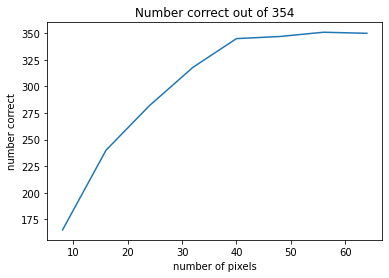

In [56]:
import matplotlib.pyplot as plt


xAxis = xAx
yAxis = yAx
plt.plot(xAxis,yAxis)
plt.title('Number correct out of 354')
plt.xlabel('number of pixels')
plt.ylabel('number correct')
plt.show()

In [25]:
DataTabX = []
DataTabY = []

In [28]:
for i in range(1,64):
    numPixels = i
    abstractionOutput = nRowModeling(i,fileName)
    numCorrect = abstractionOutput[0]
    numTotal = abstractionOutput[1]
    DataTabX += [i]
    DataTabY += [numCorrect]
    print(f"When we give the model the first {numPixels} pixels of a number, we get {numCorrect} correct out of {numTotal}")

When we give the model the first 1 pixels of a number, we get 33 correct out of 354
When we give the model the first 2 pixels of a number, we get 55 correct out of 354
When we give the model the first 3 pixels of a number, we get 86 correct out of 354
When we give the model the first 4 pixels of a number, we get 99 correct out of 354
When we give the model the first 5 pixels of a number, we get 142 correct out of 354
When we give the model the first 6 pixels of a number, we get 160 correct out of 354
When we give the model the first 7 pixels of a number, we get 164 correct out of 354
When we give the model the first 8 pixels of a number, we get 165 correct out of 354
When we give the model the first 9 pixels of a number, we get 164 correct out of 354
When we give the model the first 10 pixels of a number, we get 168 correct out of 354
When we give the model the first 11 pixels of a number, we get 193 correct out of 354
When we give the model the first 12 pixels of a number, we get 196 

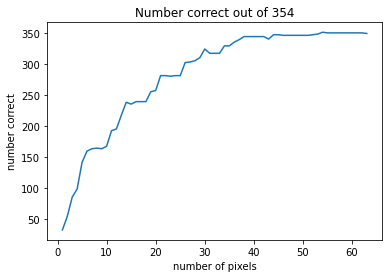

In [32]:


xAxis = DataTabX[2:]
yAxis = DataTabY[2:]
plt.plot(xAxis,yAxis)
plt.title('Number correct out of 354')
plt.xlabel('number of pixels')
plt.ylabel('number correct')
plt.show()